In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = np.array([[1+1j, 1+2j], [1-1j, 1+3j]])

In [26]:
mu = np.mean(data, axis=0)

In [28]:
temp = np.zeros((2, 2))*1j
for i in range(data.shape[0]):
    row = data[i].copy() - mu
    row = row.reshape(2, 1)
    row_conj = np.conjugate(data[i].copy()) - mu
    row_conj = row_conj.reshape(1, 2)
    
    print(row.dot(row_conj))
    temp += row.dot(row_conj)

[[ 1.  +0.j  4.5 +0.j]
 [-0.5 +0.j -2.25+0.j]]
[[ 1.  +0.j -5.5 +0.j]
 [-0.5 +0.j  2.75+0.j]]


In [31]:
temp 

array([[ 2. +0.j, -1. +0.j],
       [-1. +0.j,  0.5+0.j]])

In [30]:
np.cov(data.T, bias=False)

array([[ 2. +0.j, -1. +0.j],
       [-1. +0.j,  0.5+0.j]])

In [23]:
np.cov(data.real.T, bias=False)

array([[0., 0.],
       [0., 0.]])

In [24]:
np.cov(np.abs(data.T), bias=False)

array([[0.        , 0.        ],
       [0.        , 0.42893219]])

In [63]:
t = np.linspace(0, 4, 100)
k = 0.3
xt = np.sin(2 * np.pi * t * k) + np.sin(2 * np.pi * t * 4 * k)

In [65]:
k, 4 * k

(0.3, 1.2)

In [66]:
noise = np.random.randn(100) * 0.3

In [67]:
xt_noise = xt+noise

In [68]:
t_sample = t[::2]
xt_noise_sample = xt_noise[::2]

In [69]:
t_sample.shape, xt_noise.shape

((50,), (100,))

Text(0.5, 0, '$x[t]$')

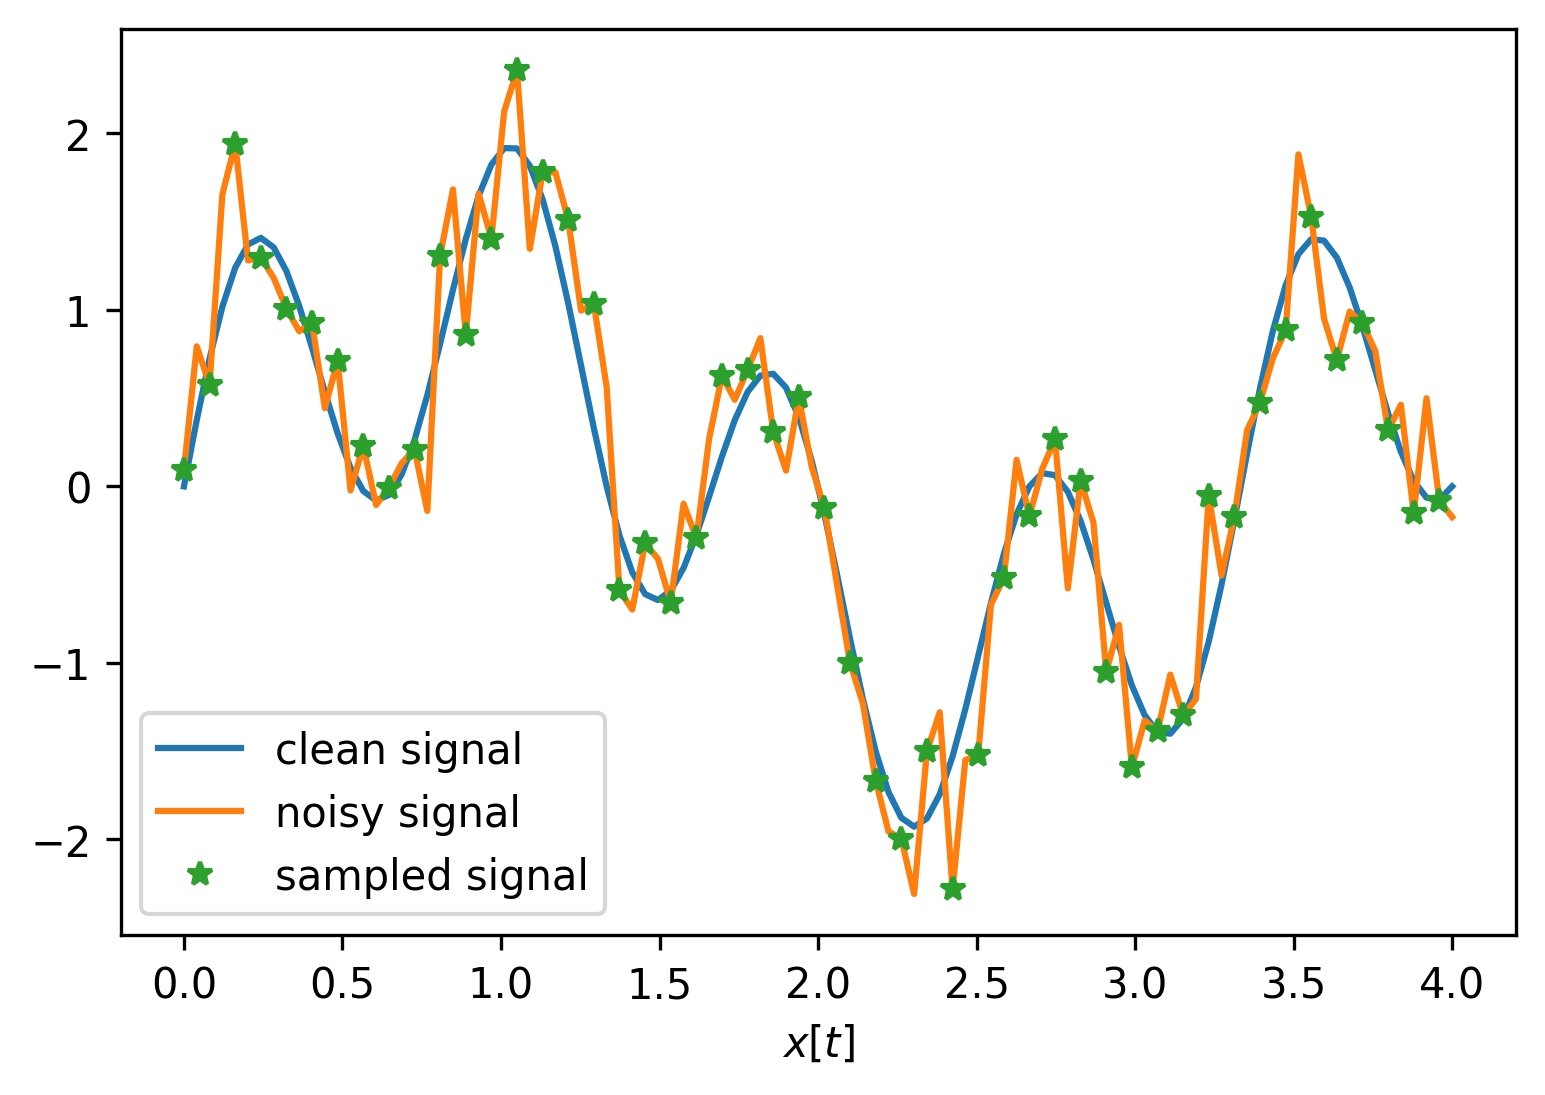

In [70]:
plt.figure(dpi=300)
plt.plot(t, xt, label='clean signal')
plt.plot(t, xt_noise, label='noisy signal')
plt.plot(t_sample, xt_noise_sample, '*',label='sampled signal')
plt.legend()
plt.xlabel('$x[t]$')

In [81]:
x_hat = np.fft.fft(xt_noise)
x_hat = np.fft.fftshift(x_hat)

In [82]:
freq = np.fft.fftfreq(n=100, d=1/25)
freq = np.fft.fftshift(freq)

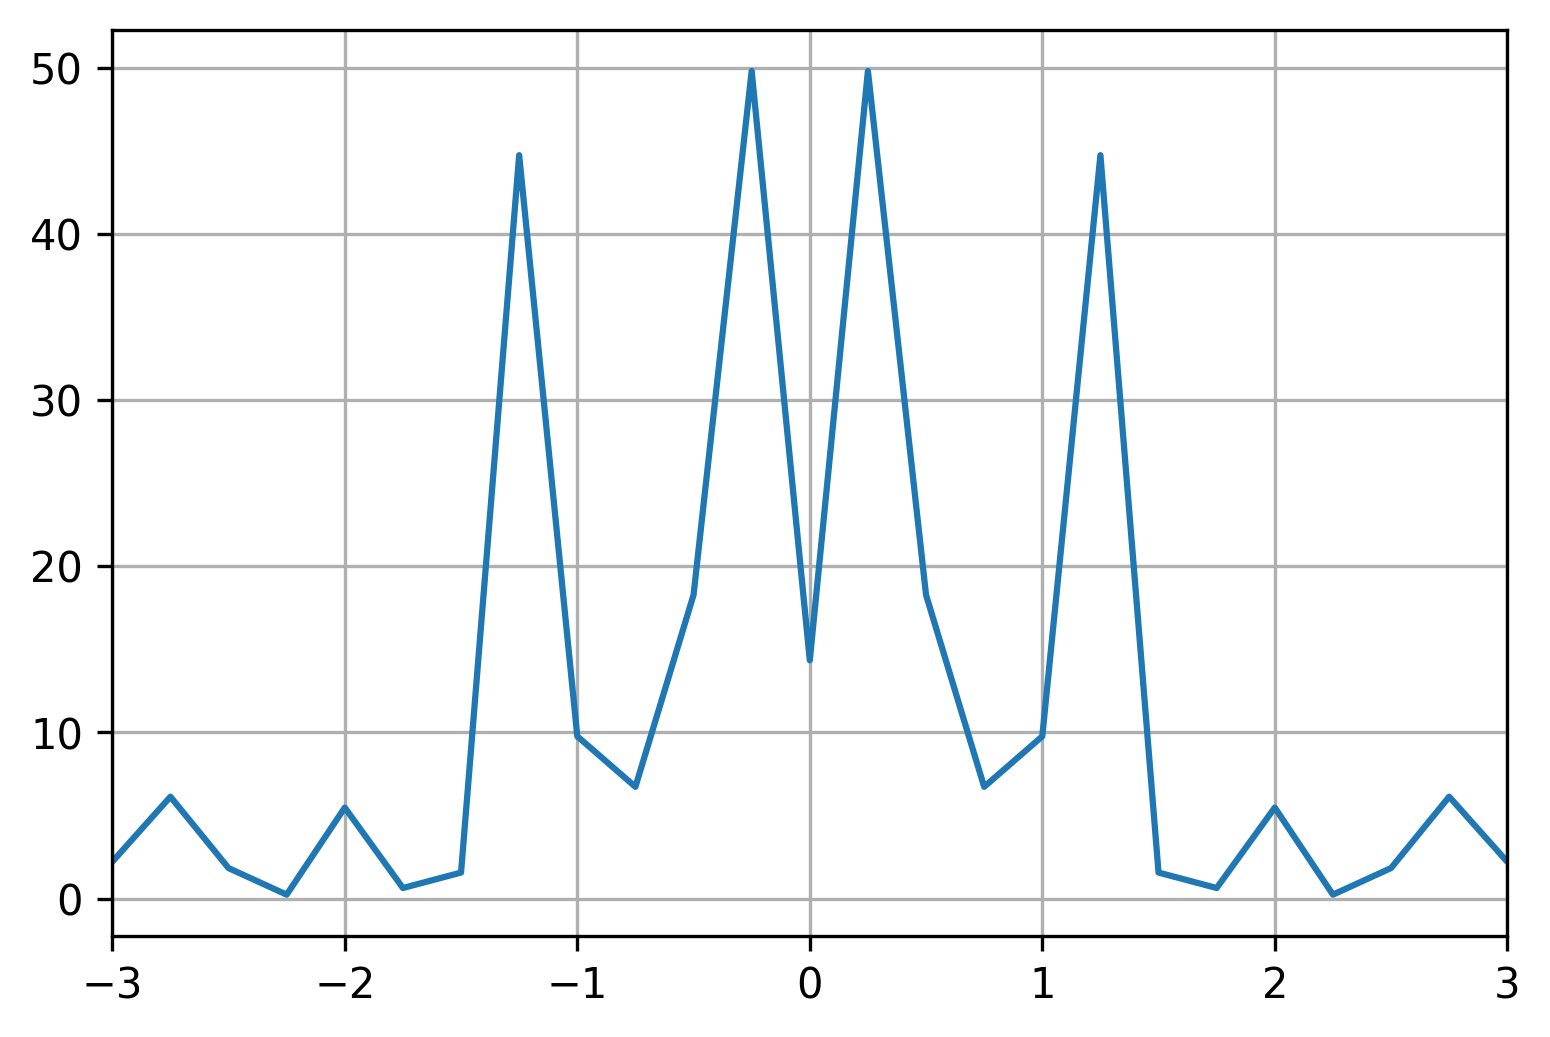

In [83]:
plt.figure(dpi=300)
plt.plot(freq,np.abs(x_hat))
plt.xlim(-3,3)
plt.grid()

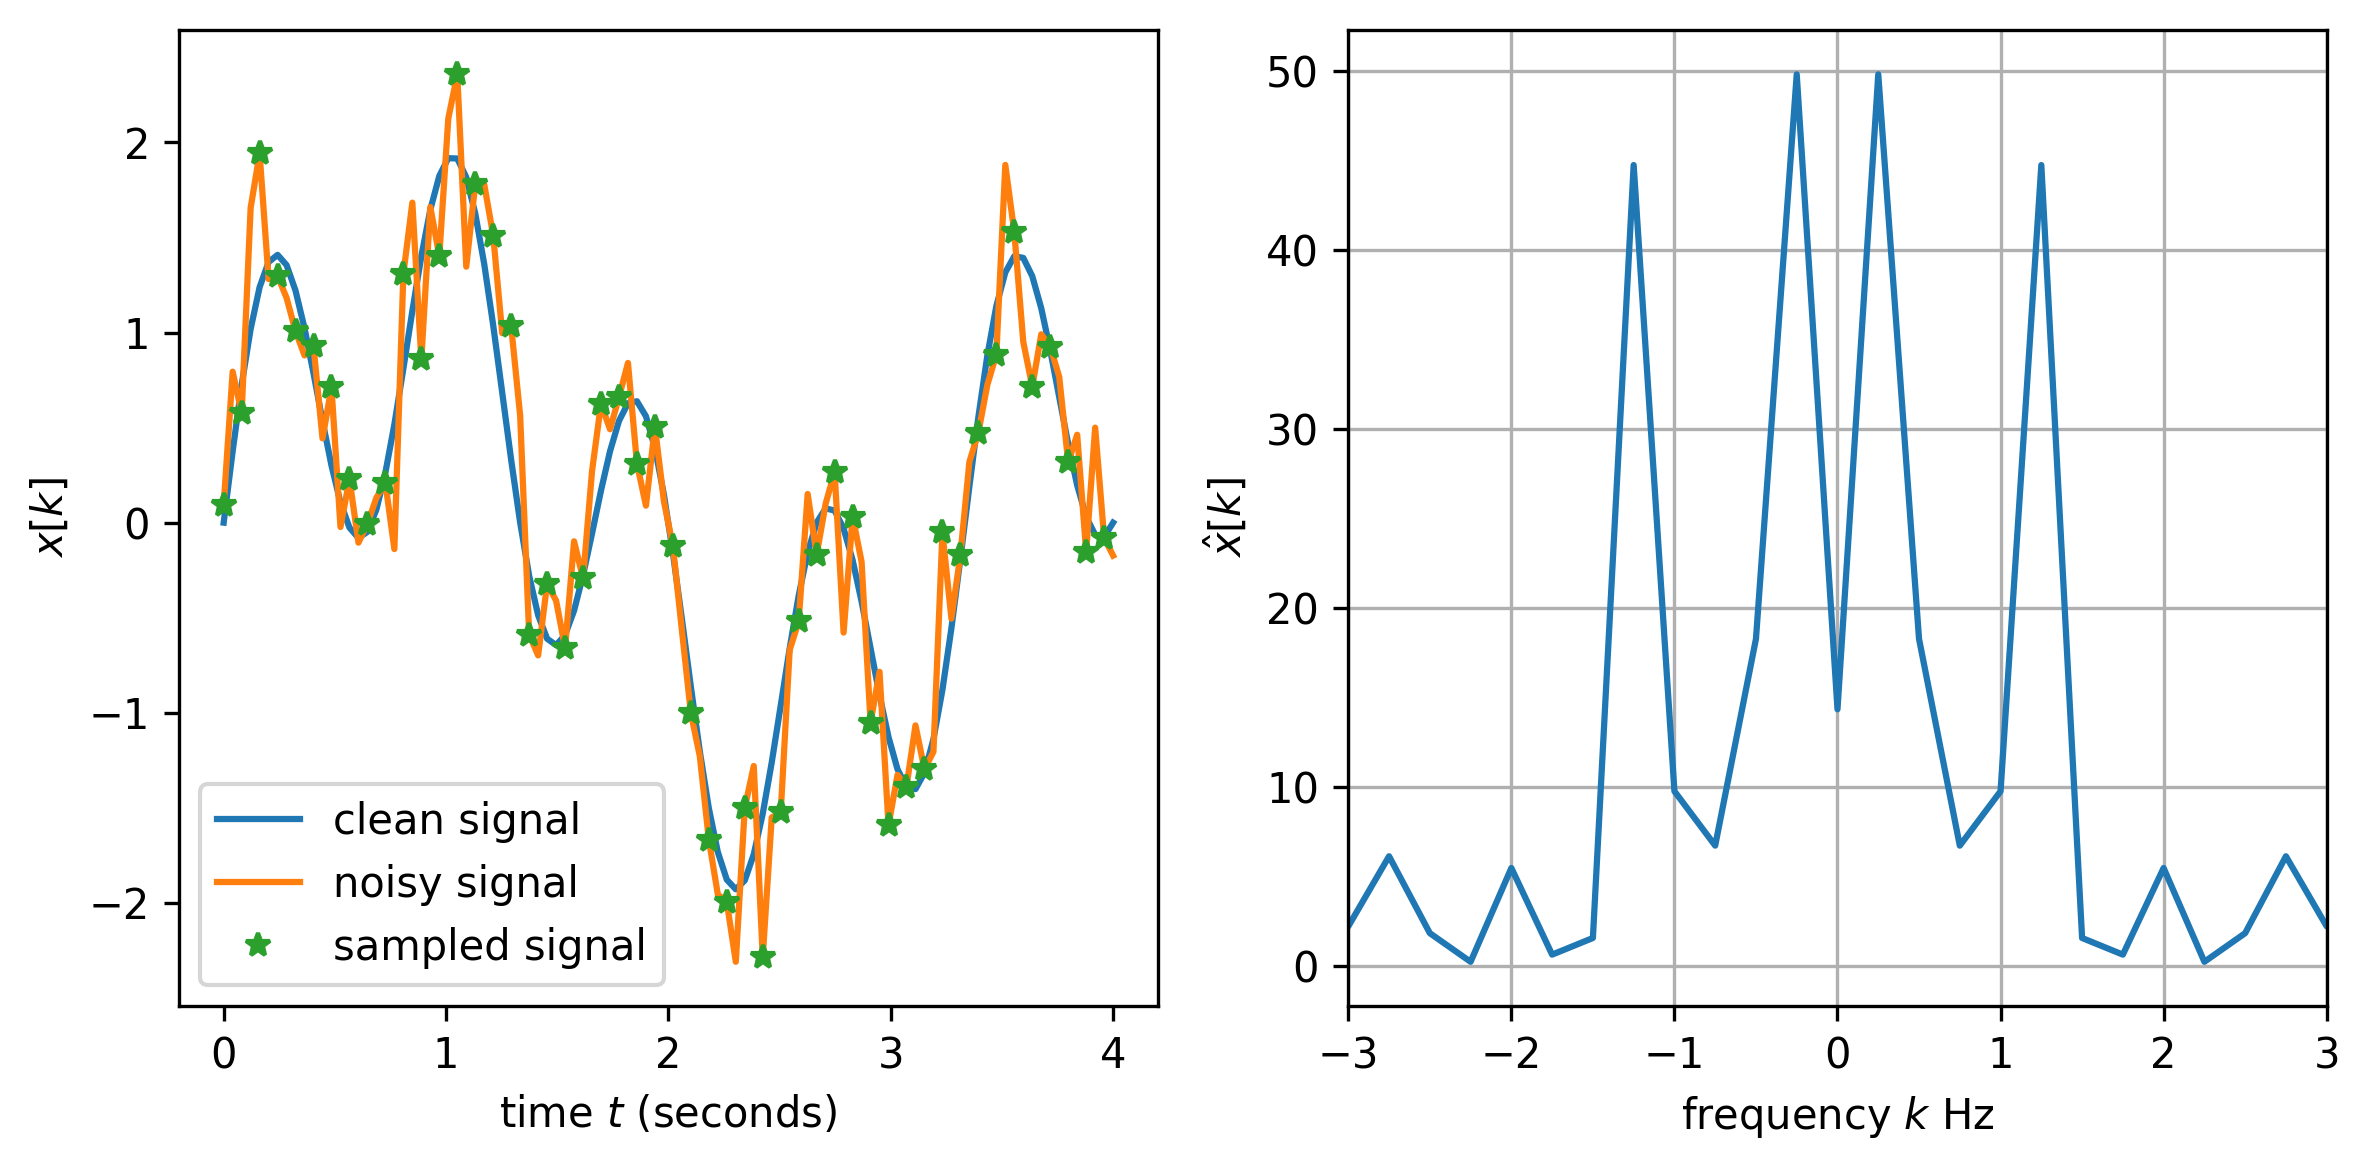

In [92]:
fig, ax = plt.subplots(1, 2, dpi=300,figsize=(8,4))
ax[0].plot(t, xt, label='clean signal')
ax[0].plot(t, xt_noise, label='noisy signal')
ax[0].plot(t_sample, xt_noise_sample, '*',label='sampled signal')
ax[0].legend()
ax[0].set_xlabel('time $t$ (seconds)')
ax[0].set_ylabel('$x[k]$')
ax[1].plot(freq,np.abs(x_hat))
ax[1].set_xlim(-3,3)
ax[1].grid()
ax[1].set_ylabel('$\hat{x}[k]$')
ax[1].set_xlabel('frequency $k$ Hz')
plt.tight_layout()